 # PELÍCULAS DISNEY A LO LARGO DEL TIEMPO

## Trabajo de Inmaculada Parreño Rueda

El proyecto lo realizaremos en torno a una tabla de datos sobre las peliculas que Disney ha sacado desde 1937 hasta 2016.

In [1]:
import csv
import statistics
from matplotlib import pyplot as plt
from collections import namedtuple

### 1. Lectura del Archivo csv

In [9]:
def lee_peliculas(fichero):
    disney = []
    with open(fichero, encoding = 'utf-8') as f:
        for linea in f:
            movie_title, release_date, genre, mpaa_rating, total_gross, inflation_adjusted_gross = linea.split(',') 
            #print(linea.split(','))
            movie_title = str(movie_title)
            release_date = str(release_date)
            genre = str(genre)
            mpaa_rating = str(mpaa_rating)
            total_gross = str(total_gross)
            inflation_adjusted_gross = str(inflation_adjusted_gross)
            tupla = (movie_title, release_date, genre, mpaa_rating, total_gross, inflation_adjusted_gross)
            disney.append(tupla)
    return disney

In [10]:
PELICULAS_DISNEY = lee_peliculas("disney_movies.csv")
mostrar_numerado(PELICULAS_DISNEY[:15])

1 ('movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross', 'inflation_adjusted_gross\n')
2 ('Snow White and the Seven Dwarfs', '1937-12-21', 'Musical', 'G', '184925485', '5228953251\n')
3 ('Pinocchio', '1940-02-09', 'Adventure', 'G', '84300000', '2188229052\n')
4 ('Fantasia', '1940-11-13', 'Musical', 'G', '83320000', '2187090808\n')
5 ('Song of the South', '1946-11-12', 'Adventure', 'G', '65000000', '1078510579\n')
6 ('Cinderella', '1950-02-15', 'Drama', 'G', '85000000', '920608730\n')
7 ('Lady and the Tramp', '1955-06-22', 'Drama', 'G', '93600000', '1236035515\n')
8 ('101 Dalmatians', '1961-01-25', 'Comedy', 'G', '153000000', '1362870985\n')
9 ('The Absent Minded Professor', '1961-03-16', 'Comedy', '', '25381407', '310094574\n')
10 ('Babes in Toyland', '1961-12-14', 'Musical', 'G', '10218316', '124841160\n')
11 ('Bon Voyage!', '1962-05-17', 'Comedy', 'Not Rated', '9230769', '109581646\n')
12 ('The Sword in the Stone', '1963-12-25', 'Adventure', '', '22182353', '153870834

Al ejecutar la función esta nos da los datos de las películas que contenia el archivo csv.

### 2. Funciones de Transformación y Filtrado

Una vez hemos conseguido abrir nuestro fichero csv podemos empezar a trabajar con los datos de este.

Es esta primera función trabajaremos con los datos de los distintos generos de las películas de disney. Des esta forma le pediremos al programa que extraiga todos los generos que Disney ha usado para sus películas y la cantidad de todos estos en total.

In [11]:
def mostrar_numerado(coleccion):
    i=0
    for p in coleccion:
        i=i+1
        print(i,p)

In [12]:
def calcula_generos(disney):
    
    lista_peliculas= []
    for tupla in PELICULAS_DISNEY:
        genero= tupla[2] #el genero de las peliculas esta en la 3 posicion
        lista_peliculas.append(genero)
        
    lista_peliculas = set(lista_peliculas)
    return lista_peliculas

In [13]:
generos = calcula_generos(PELICULAS_DISNEY)
mostrar_numerado(generos)
print("El número de distintos géneros con los que trabaja Disney es:", len(generos))

1 
2 Adventure
3 Documentary
4 Thriller/Suspense
5 Concert/Performance
6 Musical
7 Drama
8 Romantic Comedy
9 Comedy
10 Black Comedy
11 Horror
12 Western
13 genre
14 Action
El número de distintos géneros con los que trabaja Disney es: 14


La segunda función que vamos a llevar a cabo en este apartado es la de filtrado

In [14]:
def filtra_por_generos(disney, generos):
    
    filtradas= [(a) for a, b, c, d, e, f in PELICULAS_DISNEY if c in generos]
    return filtradas

In [15]:
#Probamos si funciona la función filtrada_por_generos
filtrado_peliculas =  filtra_por_generos(PELICULAS_DISNEY, "Musical")
print("Encontradas", len (filtrado_peliculas),"películas musicales:")
mostrar_numerado(filtrado_peliculas)

Encontradas 33 películas musicales:
1 Snow White and the Seven Dwarfs
2 Fantasia
3 Babes in Toyland
4 The Jungle Book
5 The Aristocats
6 Bedknobs and Broomsticks
7 The Many Adventures of Winnie the Pooh
8 Herbie Goes to Monte Carlo
9 The Black Hole
10 Midnight Madness
11 The Last Flight of Noah’s Ark
12 The Devil and Max Devlin
13 Beauty and the Beast
14 Newsies
15 Passed Away
16 A Gun in Betty Lou's Handbag
17 Swing Kids
18 Bound by Honor
19 My Boyfriend's Back
20 Father Hood
21 The Nightmare Before Christmas
22 Red Rock West
23 The War at Home
24 Evita
25 Endurance
26 Fantasia 2000 (IMAX)
27 Fantasia 2000 (Theatrical Release)
28 High Heels and Low Lifes
29 Beauty and the Beast (IMAX)
30 Frank McKlusky C.I.
31 Tim Burton's The Nightmare Before Chr…
32 High School Musical 3: Senior Year
33 Into the Woods


Otro filtrado que podemos es el de el tipo de clasificación de las películas. En esta función le pedimos al programa que nos muestre todas aquellas películas que están clasificadas en rango "R", es decir, no recomendada para menores de 17 años.

In [41]:
def filtra_por_clase(disney, clase):
    
    filtrado= [(a) for a, b, c, d, e, f in PELICULAS_DISNEY if d in clase]
    return filtrado

In [48]:
#Probamos si funciona la función filtrada_por_generos
filtrado_movies =  filtra_por_clase(PELICULAS_DISNEY, "R")
print("Encontradas", len (filtrado_movies),"películas clasificadas R:")
mostrar_numerado(filtrado_movies[:18])
print("Se han encontrado", len(filtrado_movies), "películas con clasificación R, pero solo mostramos las 18 primeras.")

Encontradas 155 películas clasificadas R:
1 The Absent Minded Professor
2 The Sword in the Stone
3 Blackbeard's Ghost
4 The Boatniks
5 Bedknobs and Broomsticks
6 The Apple Dumpling Gang
7 Freaky Friday
8 The Many Adventures of Winnie the Pooh
9 The Rescuers
10 Herbie Goes to Monte Carlo
11 The Black Hole
12 Midnight Madness
13 The Last Flight of Noah’s Ark
14 The Devil and Max Devlin
15 Amy
16 The Fox and the Hound
17 Condorman
18 Night Crossing
Se han encontrado 155 películas con clasificación R, pero solo mostramos las 18 primeras.


De esta forma hemos creado una función que nos muestra todas aquellas películas con el género o la clasificación que deseemos buscar. De la misma forma le indicamos al programa que nos muestre la cantidad total de películas con dicho género.

### 2.1. Ordenar los Datos

La tercera de las funciones de esta sección es una función de ordenar. Con este tipo de funciones podemos ordenar los datos de nuestro fichero en función a un valor de mayor a menor.
Con esta función podemos ordenar nuestras películas de mayor a menor en función de las ganacias.

In [25]:
def ordena_por_ganacias(disney):

    return sorted(disney, reverse=True, key=lambda x:x [4])

In [26]:
mostrar_numerado(ordena_por_ganacias(PELICULAS_DISNEY)[:15])

1 ('movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross', 'inflation_adjusted_gross\n')
2 ('Gnomeo and Juliet', '2011-02-11', 'Comedy', 'G', '99967670', '106270797\n')
3 ('Hercules', '1997-06-13', 'Adventure', 'G', '99112101', '182029412\n')
4 ('Meet the Robinsons', '2007-03-30', 'Adventure', 'G', '97822171', '119860589\n')
5 ('Inspector Gadget', '1999-07-23', 'Comedy', 'PG', '97387965', '161610341\n')
6 ('Dead Poets Society', '1989-06-02', 'Drama', 'PG', '95860116', '202531517\n')
7 ('Scenes from a Mall', '1991-02-22', 'Comedy', '', '9563393', '19149495\n')
8 ('The Princess Diaries 2: Royal Engagement', '2004-08-11', 'Romantic Comedy', 'G', '95149435', '129164207\n')
9 ('Unbreakable', '2000-11-22', 'Thriller/Suspense', 'PG-13', '94999143', '148208901\n')
10 ('The Journey of Natty Gann', '1985-09-27', 'Drama', '', '9468512', '22302956\n')
11 ('Beverly Hills Chihuahua', '2008-10-03', 'Comedy', 'PG', '94514402', '110932022\n')
12 ('Star Wars Ep. VII: The Force Awakens', '2

### 3. Funciones de Visualización

In [18]:
def muestra_evolucion_ganacias(disney):
    ganancias= [c for _, _, c, _, _, _ in disney]
    plt.plot(ganancias, label='ganancias')
    plt.legend()
    plt.show()

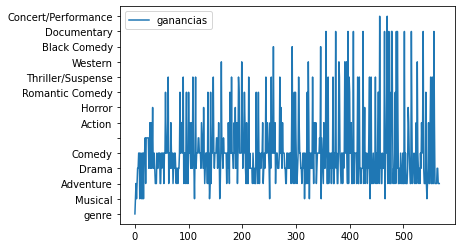

In [19]:
# Test de la función muestra_evolucion_ganancias
muestra_evolucion_ganacias(PELICULAS_DISNEY)

In [20]:
def muestra_medias_por_generos(disney):

    # Calculamos la lista de ediciones
    generos = calcula_generos(disney)
    total_gross= [e for _,_,_,_,e,_ in disney]
    # Componemos y visualizamos la gráfica
    plt.bar(total_gross, generos)
    plt.xticks(total_gross, total_gross, fontsize=8)
    plt.show()

TypeError: unhashable type: 'set'

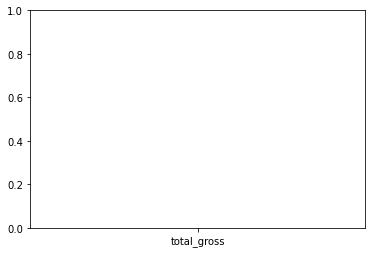

In [156]:
muestra_medias_por_generos(PELICULAS_DISNEY)